In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


c:\Users\makan\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST(root=r'C:\terme 8\Udemy.PyTorch.for.Deep.Learning.with.Python.Bootcamp_p30download.com\13 . trains\pytorch\3. CNN\data', train = True, transform= transform,download=True)

In [4]:
test_data = datasets.MNIST(root=r'C:\terme 8\Udemy.PyTorch.for.Deep.Learning.with.Python.Bootcamp_p30download.com\13 . trains\pytorch\3. CNN\data', train = False, transform= transform, download=True)


In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: C:\terme 8\Udemy.PyTorch.for.Deep.Learning.with.Python.Bootcamp_p30download.com\13 . trains\pytorch\3. CNN\data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: C:\terme 8\Udemy.PyTorch.for.Deep.Learning.with.Python.Bootcamp_p30download.com\13 . trains\pytorch\3. CNN\data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [7]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)


In [8]:
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [9]:
for i, (X_train, y_train) in enumerate(train_data):
    break

In [12]:
X_train.shape

torch.Size([1, 28, 28])

In [10]:
x = X_train.view(1, 1 , 28, 28)

In [298]:
x.shape

torch.Size([1, 1, 28, 28])

In [299]:
x=F.relu(conv1(x))


In [300]:
x.shape

torch.Size([1, 6, 26, 26])

In [301]:
x = F.max_pool2d(x, 2, 2)

In [302]:
x.shape

torch.Size([1, 6, 13, 13])

In [303]:
x = F.relu(conv2(x))

In [304]:
x.shape

torch.Size([1, 16, 11, 11])

In [305]:
x = F.max_pool2d(x, 2, 2)

In [306]:
x.shape

torch.Size([1, 16, 5, 5])

In [307]:
x.view(-1, 16*5*5)

tensor([[4.0131e-02, 4.5844e-02, 1.2915e-01, 2.3647e-01, 1.5534e-01, 1.2100e-02,
         3.2956e-01, 5.5344e-01, 5.0835e-01, 4.2728e-01, 3.2368e-02, 2.1837e-01,
         3.5708e-01, 2.6548e-01, 1.5293e-01, 0.0000e+00, 8.6048e-03, 1.3164e-01,
         4.4261e-01, 3.5550e-01, 5.8795e-02, 1.5551e-01, 4.4277e-01, 5.6204e-01,
         4.5897e-01, 9.6035e-02, 1.3691e-01, 1.8697e-01, 1.5408e-01, 6.3381e-02,
         8.5744e-02, 1.1212e-01, 5.5214e-02, 8.8223e-02, 1.2316e-01, 8.4138e-02,
         9.6705e-02, 4.5237e-02, 6.8764e-02, 9.8113e-02, 8.2945e-02, 1.2800e-01,
         1.4320e-01, 1.3029e-01, 9.5859e-02, 1.1944e-01, 1.4969e-01, 1.0269e-01,
         1.2300e-01, 6.1911e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e

In [308]:
# class ConvModle (nn.Module):
    
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(1, 6, 3, 1)
#         self.conv2 = nn.Conv2d(6, 16, 3, 1)
#         self.fc1 = nn.Linear(5*5*16, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)
        
        
#     def forward(self, X):
#         X = F.relu(self.conv1(X))
#         X= F.max_pool2d(X, 2, 2)
#         X = F.relu(self.conv2(X))
#         X= F.max_pool2d(X, 2, 2)
#         X = X.view(-1, 5*5*16)
#         X = F.relu(self.fc1(X))
#         X = F.relu(self.fc2(X))
#         X = self.fc3(X)
#         return F.log_softmax(X, dim=1)
        
        

In [22]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 20, 3, 1)
        self.fc1 = nn.Linear(5*5*20, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*20)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [23]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
sum = 0
for param in model.parameters():
    sum+=param.numel()
sum

72294

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [313]:
# import time
# startTime = time.time()

# # trackers
# epochs = 5
# trainLosses = []
# testLosses = []
# trainCorrect = []
# testCorrect = []

# # for loop
# for i in range(epochs):
#     trnCorr = 0
#     tstCorr = 0

#     for batch, (X_train, y_train) in enumerate(train_loader):
#         y_pred = model(X_train)
#         loss = criterion(y_pred, y_train)

#         perdicted = torch.max(y_pred.data, 1)[1]
#         batchCorr = (perdicted == y_train).sum()
#         trnCorr += batchCorr

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         if batch % 600 == 0:
#             print(f'epoch: {i}, batch: {batch}, Loss: {loss.item()}')

#     trainLosses.append(loss)
#     trainCorrect.append(trnCorr)

#     # test

#     with torch.no_grad():
#         for b, (X_test, y_test) in enumerate(test_loader):

#             y_val = model(X_test)
#             perdicted = torch.max(y_val, 1)[1]
#             tstCorr += (perdicted == y_test).sum()
#     loss = criterion(y_val, y_test)
#     testCorrect.append(tstCorr)
#     testLosses.append(loss)


# totalTime = time.time() - startTime
# print(f'training took {totalTime/60} min')


In [26]:
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 0.43921551  accuracy:  77.950%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.32211992  accuracy:  85.558%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.02131993  accuracy:  88.939%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.53924263  accuracy:  90.692%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.02812634  accuracy:  91.737%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.73471224  accuracy:  92.603%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.00129716  accuracy:  93.212%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.07794611  accuracy:  93.746%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.00229937  accuracy:  94.143%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.00134945  accuracy:  94.468%
epoch:  1  batch:  600 [  6000/60000]  loss: 0.00994444  accuracy:  97.983%
epoch:  1  batch: 1200 [ 12000/60000]  loss: 0.00580146  accuracy:  97.867%
epoch:  1  batch: 1800 [ 18000/60000]  loss: 0.01963875  accuracy:  97.956%
epoch:  1  b

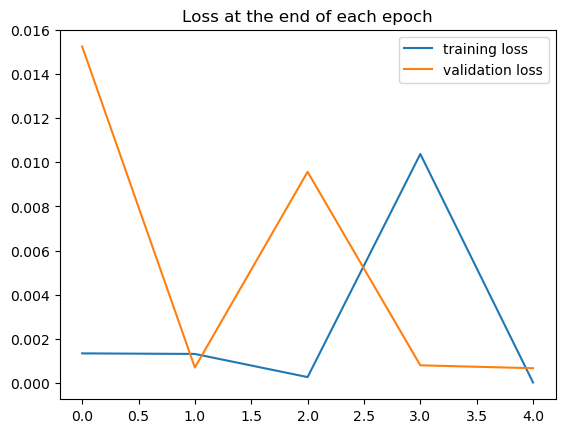

In [27]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [28]:
test_losses

[tensor(0.0152),
 tensor(0.0007),
 tensor(0.0096),
 tensor(0.0008),
 tensor(0.0007)]

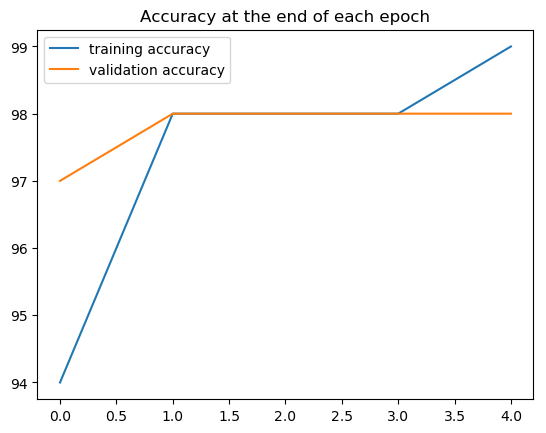

In [29]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [30]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [31]:
test_load_all

In [32]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9876/10000 =  98.760%


In [33]:
predicted.shape

torch.Size([10000])

In [34]:
misses = np.array([])

for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

124

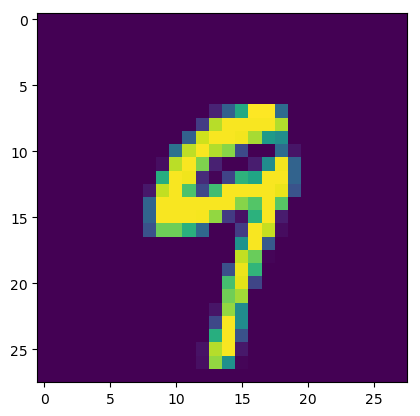

In [37]:
plt.imshow(test_data[2019][0].reshape(28,28))

In [38]:
model.eval()
with torch.no_grad():
    
    newPredicition = model(test_data[2019][0].view(1, 1, 28, 28))

In [39]:
newPredicition

tensor([[-2.1194e+01, -2.3048e+01, -1.6221e+01, -1.5465e+01, -1.2296e+01,
         -1.6390e+01, -2.8606e+01, -1.1696e+01, -1.5271e+01, -1.3351e-05]])

In [40]:
newPredicition.argmax()

tensor(9)